<a href="https://colab.research.google.com/github/pinkdolphin11/ESAA/blob/main/HW_1125_tf_keras_50~95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 3. Keras

## 01. 딥러닝 준비

### 1-1. 주요 용어

**1) hyper-parameter**

* 머신러닝 모델 훈련 시, 사용자가 직접 설정해야 하는 값(ex. 학습 속도, 반복 훈련 횟수 등)

* 예측 성능에 많은 영향을 미치므로 하이퍼파라미터 튜닝에 많은 시간을 투자하는 것이 일반적임


**2) underfitting vs. overfitting**

* train set : 머신러닝 모델이 학습할 데이터

* test set : 머신러닝 모델이 예측해야 하는 대상 데이터. 정답 레이블(label)이 없음.

* test set이 train set과 다른 분포를 갖거나, train set이 특정 레이블에 편향된 데이터로 이루어졌을 경우 test set에서의 예측 성능이 현저히 떨어짐.

* 과소적합 : 모델이 충분히 학습되지 않아 예측 성능이 떨어지는 경우

* 과대적합 : train set을 지나치게 반복 학습하여 과하게 적합된 상태. train set의 불필요한 노이즈까지 과도하게 모델에 반영되어, test set에서의 예측 오차 발생 확률이 커짐.

  -> 모델 학습 시 과소적합/과대적합 문제를 최소화하면서 정확도를 가장 높여야 함

  * train, test set를 동일한 분포로 구성

  * 전처리를 통해 불필요한 노이즈 제거

  * train set의 일부를 validation set(검증 데이터)으로 활용하여 검증 성능이 가장 좋은 구간을 모델이 가장 이상적으로 학습된 지점이라 판단하는 방법으로 최종 모델 결정

**3) epoch**

* 1 epoch : 딥러닝 모델이 반복 훈련 시 train set을 전부 학습에 사용하는 1회의 훈련 루프

* 사전에 설정된 최대 epoch 횟수까지 반복적으로 진행하고 종료

**4) loss function(손실함수)**

* 예측값과 정답 값의 차이(오차), 딥러닝 모델의 출력값과 실제 값의 차이

* 분류

  * 이진 분류(출력층의 활성화 함수 'sigmoid') : binary_crossentropy

  * 다중 분류(대상 클래스 'one-hot vector', 출력층의 활성화 함수 'softmax') : categorical_crossentropy

  * 정답 클래스가 서로 다른 숫자로 구분된 레이블 값(ex.0,1,2...) : sparse_categorical_crossentropy

* 회귀

  * mean_squared_error, mean_absolute_error 등


* 아래와 같이 클래스 및 함수 형태로 정의되어 있는 손실함수를 지정하여 사용

```
import tensorflow as tf

#클래스
tf.keras.losses.BinaryCrossentropy()

#함수
tf.keras.losses.binary_crossentropy

```




**5) gradient descent(경사하강법)**

* 딥러닝 모델 훈련 시, 모델 내부의 가중치(weight)에 대한 미분 값을 구하고, 목적 함수 값이 낮아지는 방향으로 차감하면서 최소 함수 값을 갖도록 하는 방법

<img src = "https://drive.google.com/uc?id=1OIiTI3If4xp4HRgF5Nm5ed-I2NeE9WEj" height = 300 width = 400>

* 손실함수 값을 최소로 만드는 가중치를 찾음

#### NumPy로 경사하강법 구현하기

단순선형회귀식 $y = wx + b$가 주어졌을 때 손실함수를 최소화하는 w, b를 구하는 과정을 경사하강법으로 구현해보자.

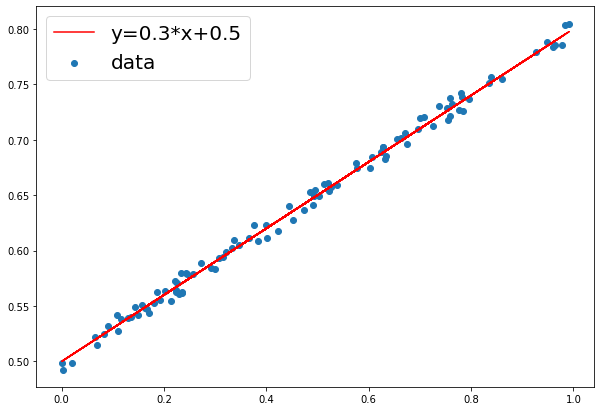

w:0.3,b:0.5


In [1]:
import numpy as np
import matplotlib.pyplot as plt

#샘플에 활용할 데이터셋 만들기
def make_linear(w=0.5, b=0.8, size=50, noise=1.0): # w,b 값은 임의로 지정
  x = np.random.rand(size)
  y = w * x + b
  noise = np.random.uniform(-abs(noise), abs(noise), size=y.shape)
  yy = y + noise
  plt.figure(figsize=(10,7))
  plt.plot(x,y,color='r',label=f'y={w}*x+{b}')
  plt.scatter(x,yy,label='data')
  plt.legend(fontsize=20)
  plt.show()
  print(f'w:{w},b:{b}')
  return x, yy

x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

* 그래디언트 구하기 : 손실함수를 w, b에 대해 편미분한 값을 구하고 학습률 계수를 곱하여 이전의 w, b로부터 차감한다.

In [2]:
#최대 반복 횟수
num_epoch = 1000

#학습률
learning_rate = 0.005

#에러 기록
errors = []

#random한 값으로 w, b를 초기화
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
  # Hypothesis 정의
  y_hat = w*x+b
  # Loss Function 정의
  error = 0.5*((y_hat-y)**2).sum()
  if error < 0.005:
    break
  # Gradient 미분 계산
  w = w-learning_rate*((y_hat-y)*x).sum()
  b = b-learning_rate*((y_hat-y)).sum()

  errors.append(error)

  if epoch % 5 == 0:
    print("{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}".format(epoch,w,b,error))

print("----" * 15)
print("{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}".format(epoch,w,b,error))

 0 w = 0.56629, b = 0.62316 error = 21.02476
 5 w = 0.44415, b = 0.43227 error = 0.08298
10 w = 0.42312, b = 0.44031 error = 0.06024
15 w = 0.40582, b = 0.44872 error = 0.04472
20 w = 0.39100, b = 0.45595 error = 0.03330
25 w = 0.37829, b = 0.46214 error = 0.02491
30 w = 0.36738, b = 0.46746 error = 0.01874
35 w = 0.35803, b = 0.47202 error = 0.01420
40 w = 0.35002, b = 0.47592 error = 0.01086
45 w = 0.34314, b = 0.47928 error = 0.00840
50 w = 0.33724, b = 0.48215 error = 0.00659
55 w = 0.33219, b = 0.48462 error = 0.00527
------------------------------------------------------------
57 w = 0.3, b = 0.5 error = 0.00484


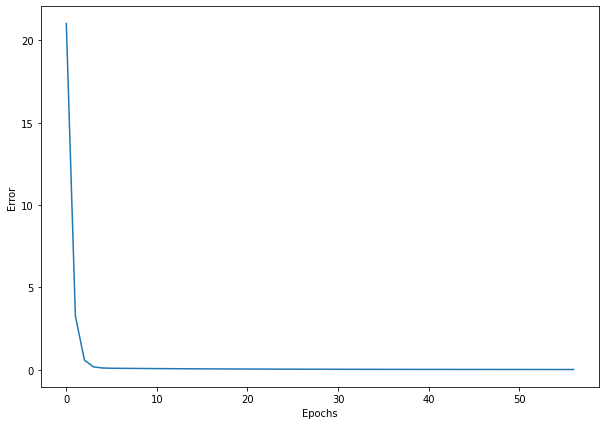

In [3]:
plt.figure(figsize=(10,7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

목표하는 오차 범위 안으로 수렴하면 반복문을 종료하고, 종료 후 w, b 계수를 확인하면 샘플 데이터셋 생성 시 설정한 계수와 비슷한 값이다.

### 1-2. 딥러닝 프로세스

**1) 데이터 전처리(필수)**

* 데이터를 모델에 주입하기 전에 가공하는 단계

* 전처리를 적용한 데이터셋의 형태와 모델이 입력받을 데이터셋 형태가 다르면 에러 발생

**2) 모델 생성(필수)**

* 순차적 구조 : Sequential API

* 다중 입력 및 출력을 가진 복잡한 구조 : Functional API, Model Subclassing

**3) 모델 컴파일(필수)**

* 생성된 모델 훈련에 사용할 손실함수, 옵티마이저, 평가 지표 정의

* 모델 인스턴스에 compile() 메소드 적용, 윗줄의 여러 속성 값 설정

**4) 모델 훈련(필수)**

* fit() 함수에 훈련에 필요한 정보(ex. train set, test set, valid set, epoch, batch size, callback function 등)를 매개변수(파라미터)로 전달

**5) 모델 검증**

* 훈련이 완료된 모델을 검증

* 훈련 시 사용하지 않은 valid set을 모델에 입력하고, 예측값을 정답과 비교하여 평가지표 계산

* 검증 결과를 바탕으로, 목표 성능에 도달할 때까지 다시 모델 생성 단계로 돌아가 모델 수정, 컴파일, 훈련을 거쳐 재평가하는 단계를 반복

**6) 모델 예측**

* 훈련, 검증이 완료된 모델로 test set에 대하여 예측한 결과 반환

## 02. 단순 신경망 훈련

### 2-1. 선형회귀

케라스를 활용하여 단순선형회귀 모델을 직접 만들고 딥러닝을 학습해보자.

함수식 : $y=wx+b$ ($w$ : weight, $b$ : bias)

### 2-2. 뉴런(node)

* 인공 신경망을 구성하는 하나의 신경

* 신경망은 여러 개의 layer를 가지며, 1개의 레이어는 1개 이상의 뉴런으로 구성

* 뉴런의 내부에는 가중치가 존재, 모델이 훈련을 진행하며 오차 역전파를 통해 뉴런의 가중치 업데이트

### 2-3. Dense 레이어

* 심층 신경망 모델을 구성하는 가장 기본적인 레이어

* 각 레이어와 레이어 사이에 모든 뉴런이 서로 연결되어 있음(완전 연결층 : Fully Connected Layer)

<img src = "https://drive.google.com/uc?id=1xvekO4qvpO0qIrpgqNKcJwXG30Tppk0P" height = 300 width = 500>



```
import tensorflow as tf

#노드 개수 10개로 지정
tf.keras.layers.Dense(10)

#Relu 활성화 함수 적용
tf.keras.layers.Dense(10,activation='relu')
```



### 2-4. 데이터셋 만들기

In [4]:
#샘플 데이터셋 생성

x = np.arange(1,6) # 5개의 순차적인 x 데이터
y=3*x+2 # y=3x+2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


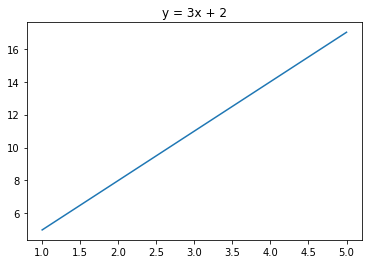

In [5]:
import matplotlib.pyplot as plt

#시각화

plt.plot(x,y)
plt.title('y = 3x + 2')
plt.show()

### 2-5. Sequential API

* 층을 이어 붙이듯 시퀀스에 맞게 일렬로 연결하는 방식

* 입력 레이어부터 출력 레이어까지 순서를 가짐

* 데이터는 시퀀스의 가장 앞에 위치한 층에 투입되고, 순서대로 각 층을 하나씩 통과하면서 딥러닝 연산 수행

* 매우 간결하게 딥러닝 모델을 만드는 방법임

* 2개 이상의 다중 입력/출력을 갖는 복잡한 모델은 만들 수 없음

**1) 모델 구조**

In [6]:
#1. 리스트형
##앞에 위치한 층부터 연산을 먼저 처리

import tensorflow as tf

model = tf.keras.Sequential([tf.keras.layers.Dense(10),
                             tf.keras.layers.Dense(5),
                             tf.keras.layers.Dense(1)]) # Dense layer 3개

In [7]:
#2. add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

**2) 입력 데이터 형태**

* 첫 번째 층에는 반드시 input_shape 매개변수를 지정

* input_shape : 주입할 데이터셋의 shape을 튜플 혹은 리스트로 지정

In [8]:
import tensorflow as tf
model = tf.keras.Sequential([
    # 입력 데이터의 shape=(150,4)인 경우 input_shape 지정
    tf.keras.layers.Dense(10, input_shape=[4]),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

**3) 단순선형회귀 모델 정의**

* 1개의 뉴런을 가지는 Dense 레이어 1개 사용

* 뉴런은 w(기울기), b(상수항)를 매개변수로 가짐

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1]) # 입력 데이터는 x값을 나타내는 입력 변수 1개
])

* 1개의 출력 값(y에 대한 모델의 예측값)을 가짐

* use_bias = True(default) : 상수항 b 추가됨

### 2-6. 모델 요약

In [10]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* 층별 노드의 개수 표기

* Total params : 모델 내부에 존재하는 모든 파라미터의 합계(w, b)

* Trainable params : 모델 훈련 시 업데이트할 파라미터의 총 개수(w, b)

* Non-trainable params : 업데이트하지 않을 파라미터의 총 개수

### 2-7. 컴파일

* 손실함수, 옵티마이저, 평가지표 3가지 지정 방법 : 클래스 인스턴스, 함수, 사전 정의된 문자열

* 클래스 인스턴스로 지정해야 하이퍼파라미터 튜닝을 할 수 있음(기본 설정만으로도 딥러닝 모델은 성능이 잘 나오므로, 여기서는 문자열 지정 방식을 주로 사용)

In [11]:
#긴 문자열 지정
model.compile(optimizer='sgd',loss='mean_squared_error',metrics=['mean_squared_error','mean_absolute_error'])

In [12]:
#짧은 문자열 지정
model.compile(optimizer='sgd',loss='mse',metrics=['mse','mae'])

In [13]:
#클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(0.005),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError(),
                       tf.keras.metrics.MeanSquaredError()
              ])

In [14]:
#컴파일
model.compile(optimizer='sgd',loss='mse',metrics=['mae']) # sgd : gradient descent 알고리즘

### 2-8. 훈련

* weight 텐서를 업데이트하는 과정

* fit() 메소드에 입력(x), 출력(y), epoch 지정

* 매 epoch가 끝날 때마다 train set에 대한 손실, 평가지표 출력(verbose=0 : 훈련 중간 과정 출력X)

* 메소드에 validation_data 옵션 지정 시 valid set에 대한 손실, 평가지표도 출력

In [15]:
model.fit(x,y,epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 585ms/step - loss: 106.8316 - mae: 9.6810
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 62.3636 - mae: 7.4375
Epoch 3/5
1/1 [==============================] - 0s 10ms/step - loss: 36.4491 - mae: 5.7248
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 21.3466 - mae: 4.4171
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 12.5450 - mae: 3.4188


* loss를 보면 모델의 예측 오차가 점점 줄어듦

* 반복 수가 적어 과소적합 상태

In [16]:
#단순선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1])
])

#컴파일
model.compile(optimizer='sgd',loss='mse',metrics=['mae'])

#훈련
history = model.fit(x,y,epochs=1200)

Epoch 1/1200
1/1 [==============================] - 0s 342ms/step - loss: 150.4722 - mae: 11.4324
Epoch 2/1200
1/1 [==============================] - 0s 9ms/step - loss: 87.7699 - mae: 8.7687
Epoch 3/1200
1/1 [==============================] - 0s 8ms/step - loss: 51.2296 - mae: 6.7350
Epoch 4/1200
1/1 [==============================] - 0s 8ms/step - loss: 29.9351 - mae: 5.1825
Epoch 5/1200
1/1 [==============================] - 0s 10ms/step - loss: 17.5252 - mae: 3.9971
Epoch 6/1200
1/1 [==============================] - 0s 7ms/step - loss: 10.2928 - mae: 3.0921
Epoch 7/1200
1/1 [==============================] - 0s 8ms/step - loss: 6.0776 - mae: 2.4011
Epoch 8/1200
1/1 [==============================] - 0s 8ms/step - loss: 3.6206 - mae: 1.8735
Epoch 9/1200
1/1 [==============================] - 0s 10ms/step - loss: 2.1883 - mae: 1.4706
Epoch 10/1200
1/1 [==============================] - 0s 7ms/step - loss: 1.3530 - mae: 1.1628
Epoch 11/1200
1/1 [==============================] - 0s 8

* 충분한 훈련으로 mse, mae가 모두 개선됨

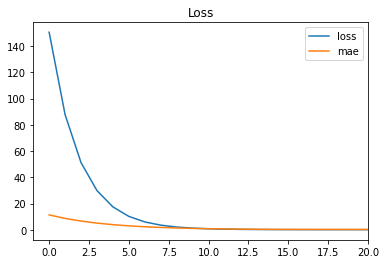

In [17]:
#epoch별 훈련 손실 및 평가지표 시각화

import matplotlib.pyplot as plt

#20 epoch까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['mae'],label='mae')
plt.xlim(-1,20)
plt.title('Loss')
plt.legend()
plt.show()

* 10 epoch까지 손실이 급격히 감소, 그 이후로 감소 폭이 둔화

* 모델 훈련 초기 단계에는 학습이 매우 빠른 속도로 진행, 일정 epoch 이후에는 느려짐

### 2-9. 검증

* 모델이 훈련을 마친 상태의 가중치를 그대로 적용하여 손실과 평가지표를 계산

In [18]:
model.evaluate(x,y) # 별도의 검증 셋이 없으므로 훈련 데이터셋의 x,y 대입

1/1 [==============================] - 0s 202ms/step - loss: 5.9078e-05 - mae: 0.0066


[5.907838203711435e-05, 0.0065972330048680305]

* 1200번 epoch를 종료한 상태에서 출력된 모델 훈련 단계에서의 값과 결과가 같음

### 2-10. 예측

In [19]:
model.predict([10])

1/1 [==============================] - 0s 138ms/step


array([[32.031883]], dtype=float32)

* 원래 식에서 x=10일때 y=32이므로 정답과 꽤 근사한 값을 예측함

## 03. 심층 신경망으로 이미지 분류

### 3-1. 케라스 내장 데이터셋 로드

In [20]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

In [21]:
#훈련/검증 set을 구분하여 제공하는 load_data()로 데이터셋 로드
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [22]:
print('train set:',x_train.shape,y_train.shape)
print('test set:',x_test.shape,y_test.shape)

train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


* train set 60000개, test set 10000개 데이터

* 입력 데이터 x_train, x_test : mnist 손글씨 이미지 데이터, 배열의 shape은 (데이터셋 크기, 28, 28)

* 28, 28은 순서대로 이미지의 세로, 가로 픽셀 크기

* 각 입력 데이터에 대응되는 출력 데이터(정답) 또한 각각 60000, 10000개가 1차원 벡터 형태로 정리되어 있음

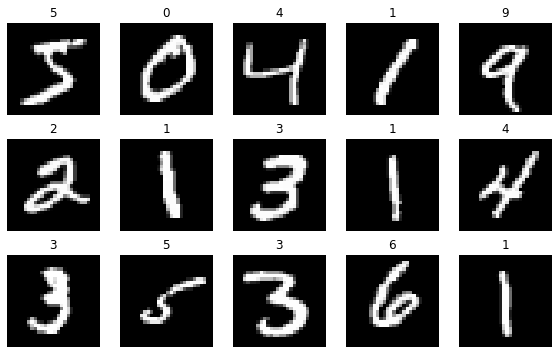

In [25]:
#train set의 처음 15장 이미지 데이터 시각화
import matplotlib.pyplot as plt

#canvas 생성
fig, axes = plt.subplots(3,5)
fig.set_size_inches(8,5)

for i in range(15):
  ax = axes[i//5,i%5]
  # imshow로 이미지 시각화
  ax.imshow(x_train[i],cmap='gray')
  ax.axis('off')
  ax.set_title(str(y_train[i])) # 입력 데이터 상단에 출력 데이터(정답) 함꼐 표시
  
plt.tight_layout()
plt.show()

### 3-2. 데이터 전처리

In [26]:
#x_train 배열의 데이터 확인
x_train[0,10:15,10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

* x_train은 numpy 배열이며, 배열의 각 원소는 이미지를 구성하는 하나의 픽셀 값과 일대일 매칭됨

In [27]:
#픽셀 값의 최소/최댓값 확인
print(f'정규화 전] 최솟값:{x_train.min()}, 최댓값:{x_train.max()}')

#데이터 정규화 - 0~1 사이 값을 가지도록
x_train = x_train/x_train.max() # 최댓값으로 나눔

#정규화 후 최소/최댓값 확인
print(f'정규화 후] 최솟값:{x_train.min()}, 최댓값:{x_train.max()}')

정규화 전] 최솟값:0, 최댓값:255
정규화 후] 최솟값:0.0, 최댓값:1.0


### 3-3. Flatten 레이어

* 정규화를 하면 개별 데이터 값의 범위는 축소되지만 원본 배열 형태는 그대로이다.

* 샘플 이미지는 (28,28) 형태로 2차원 입력이므로, Dense 레이어에 입력값으로 넣으려면 1차원 배여롤 바꿔줘야 한다.

In [28]:
#이미지 데이터를 1차원으로 전처리하여 Dense 레이어에 입력
print(f'변경 전 shape:{x_train.shape}')
print(f'1차원으로 shape 변경 후:{x_train.reshape(60000,-1).shape}')

변경 전 shape:(60000, 28, 28)
1차원으로 shape 변경 후:(60000, 784)


In [29]:
#Flatten 레이어 사용
print(f'변경 전 shape:{x_train.shape}')
print(f'Flatten 적용 후:{tf.keras.layers.Flatten()(x_train).shape}')

변경 전 shape:(60000, 28, 28)
Flatten 적용 후:(60000, 784)


### 3-4. 활성화 함수

* 입력을 비선형 출력으로 변환하는 함수

* 일반적으로 선형관계를 나타내는 함수에 비선형성을 추가하는 방법으로 표현

* 참고 : 비선형성을 추가하지 않고 선형 함수로만 층을 구성하면, 모델을 깊게 구성하더라도 결국 선형함수로 표현됨.

* 함수 예시

  * Sigmoid : $sigmoid(x)=1/(1+e^{-x})$
  
  * Hyperbolic Tangent : $tanh(x)=(e^{x}-e^{-x})/(e^{x}+e^{-x})$
  
  * ReLU : $ReLU(x)=max(x,0)$

  * Leaky ReLU : $Leaky ReLU(x)=max(x,0.1x)$

In [30]:
#Dense 레이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128,activation='relu')

In [31]:
#별도의 층으로 적용
##Dense 레이어 다음에 Batch Normalization을 적용한 후 활성화 함수를 적용할 때 많이 사용
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Activation('relu')
])

### 3-5. 입력과 출력

* 1번째 레이어 : input_shape 지정

* 마지막 레이어 : 출력층, 분류해야 할 클래스 개수와 출력층의 노드 개수가 동일해야 함

In [32]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    # 노드 = 10개(클래스 0~9)
    tf.keras.layers.Dense(10,activation='softmax')
])

* Dense 레이어를 구성하는 노드의 개수를 256 - 64 - 32로 조금씩 줄어들게 구성 -> 784개의 변수에 대한 입력값을 노드 개수를 줄여가면서 최종 출력 클래스 개수인 10개까지 정보를 축약하기 위한 설계

* 출력층의 노드가 2개 이상인 경우 sortmax 적용

* 이진 분류의 경우 sigmoid 적용(출력 레이어의 클래스를 원-핫 인코딩으로 변환하여 노드가 2개인 경우 softmax 적용)

In [33]:
tf.keras.layers.Dense(1,activation='sigmoid')
tf.keras.layers.Dense(10,activation='softmax')

### 3-6. 손실함수

* 모델의 출력층에 따라 다르게 설정

<img src = "https://drive.google.com/uc?id=1QZPWJXEvCTQDgub_rSrNRO78A3ud7wq9" height = 200 width = 700>



In [34]:
#이진 분류(출력 노드=1개,sigmoid)
model.compile(loss='binary_crossentropy')

In [36]:
#y가 원핫 벡터 : [0,0,0,0,0,1,0,0,0,0]
model.compile(loss='categorical_crossentropy')
#y가 원핫 벡터 X : [5]
model.compile(loss='sparse_categorical_crossentropy')

* mnist 데이터 : 출력 데이터가 원핫 벡터가 아니고 0~9 레이블 값을 가지므로 loss function은 'sparse_categorical_crossentropy'이다.

### 3-7. 옵티마이저

* 손실을 낮추기 위해 가중치, 학습률 등 신경망의 속성을 변경하는 데 사용하는 최적화 방법

* ex. SGD, Adam(일반적), Adagrad, Nadam 등

In [37]:
#클래스 인스턴스로 지정
adam = tf.keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=adam)

#문자열로 지정
model.compile(optimizer='adam')

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


### 3-8. 평가지표(metrics)

* accuracy를 가장 많이 사용

* 모델 컴파일 단계에서 하나 이상의 평가지표를 지정

In [38]:
#클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [39]:
#문자열로 지정
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

### 3-9. 훈련

In [40]:
model.fit(x_train,y_train,
          # 검증 셋 지정
          validation_data=(x_test,y_test),
          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.2344 - accuracy: 0.9295 - val_loss: 16.8979 - val_accuracy: 0.9657
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0943 - accuracy: 0.9711 - val_loss: 15.2275 - val_accuracy: 0.9732
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0676 - accuracy: 0.9786 - val_loss: 16.1559 - val_accuracy: 0.9729
Epoch 4/10
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0481 - accuracy: 0.9844 - val_loss: 17.5177 - val_accuracy: 0.9734
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0400 - accuracy: 0.9867 - val_loss: 17.6495 - val_accuracy: 0.9738
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0335 - accuracy: 0.9891 - val_loss: 15.7785 - val_accuracy: 0.9782
Epoch 7/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0270 - accuracy: 0.9914 - val_loss: 17.8026 - 

### 3-10. 평가

In [41]:
test_loss, test_acc = model.evaluate(x_test,y_test) # evaluate() : 컴파일 단계에서 지정한 손실, 정확도 반환
print('검증 셋 정확도:',test_acc)

313/313 [==============================] - 2s 5ms/step - loss: 24.9523 - accuracy: 0.9753
검증 셋 정확도: 0.9753000140190125


### 3-11. 예측

In [44]:
predictions = model.predict(x_test) # predict 변수에 예측 분류 결과를 배열 형태로 저장

313/313 [==============================] - 1s 2ms/step


In [45]:
#첫번째 이미지에 대한 분류 예측 결과 출력 - 10개의 확률값
predictions[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.99999994, 0.        , 0.        ],
      dtype=float32)

* 가장 높은 확률값을 가진 클래스가 최종 예측된 클래스

In [46]:
import numpy as np

#0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

#첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10],axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


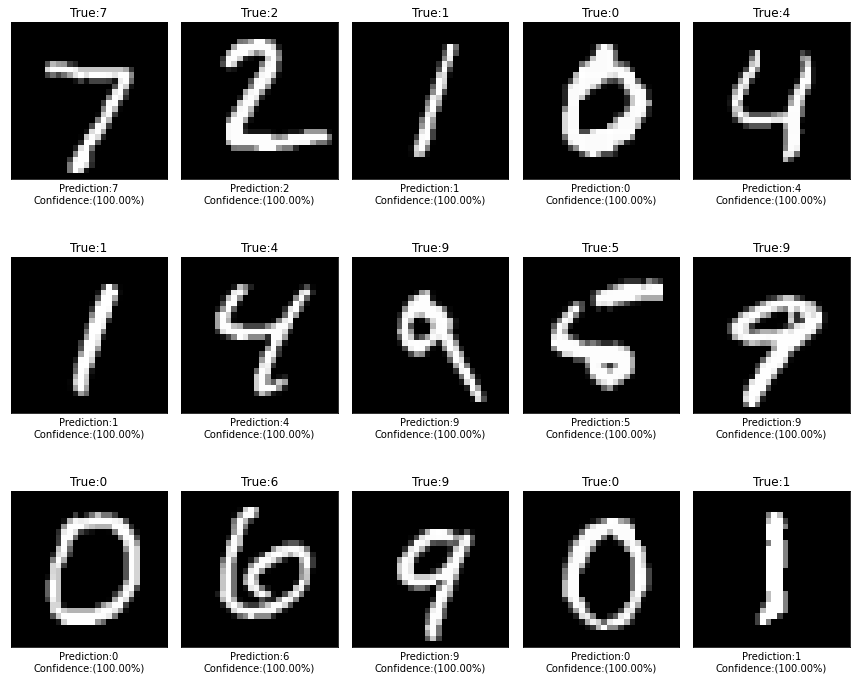

In [47]:
#15개 예측 결과 시각화

import matplotlib.pyplot as plt
def get_one_result(idx):
  img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
  return img, y_true, y_pred, confidence

fig, axes = plt.subplots(3,5)
fig.set_size_inches(12,10)
for i in range(15):
  ax = axes[i//5,i%5]
  img, y_true, y_pred, confidence = get_one_result(i)
  ax.imshow(img,cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f'True:{y_true}')
  ax.set_xlabel(f'Prediction:{y_pred}\nConfidence:({confidence:.2f}%)')
plt.tight_layout()
plt.show()

## 04. 모델 세부 설정

In [50]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()

print('train set:',x_train.shape,y_train.shape)
print('test set:',x_test.shape,y_test.shape)

x_train = x_train/x_train.max()
x_test = x_test/x_test.max()

train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


### 4-1. 초기값 설정

* Dense 레이어의 기본 초기화 방법 : Glorot Uniform

In [51]:
dense = tf.keras.layers.Dense(256,activation='relu')
dense.get_config()['kernel_initializer']

{'class_name': 'GlorotUniform', 'config': {'seed': None}}

In [52]:
#문자열 초기화
dense = tf.keras.layers.Dense(256,kernel_initializer='he_normal',activation='relu')
print(dense.get_config()['kernel_initializer'])

#클래스 인스턴스 초기화
he_normal = tf.keras.initializers.HeNormal()
dense = tf.keras.layers.Dense(256,kernel_initializer=he_normal,activation='relu')
print(dense.get_config()['kernel_initializer'])

{'class_name': 'HeNormal', 'config': {'seed': None}}
{'class_name': 'HeNormal', 'config': {'seed': None}}


* 자주 사용되는 초기화 목록

  * 'glorot_normal', 'glorot_uniform' : 글로럿 초기화(Xavier 초기화)

  * 'lecun_normal', 'lecun_uniform' : Yann Lecun 초기화

  * 'he_normal', 'he_uniform' : He 초기화

  * 'random_normal', 'random_uniform' : 정규분포, 연속균등분포 초기화

### 4-2. 규제(Regularization)

* 규제를 적용하지 않는 것이 default이므로 별도로 설정해줘야 함

In [53]:
#기본값
dense = tf.keras.layers.Dense(256,activation='relu')
dense.get_config()

{'name': 'dense_22',
 'trainable': True,
 'dtype': 'float32',
 'units': 256,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

* 과대적합 방지를 위해 모델을 구성하는 레이어마다 규제 적용 가능

* l1, l2 규제 지원

In [55]:
#l1 규제 적용
dense = tf.keras.layers.Dense(256,kernel_regularizer='l1',activation='relu')
print(dense.get_config()['kernel_regularizer'])

#클래스 인스턴스 적용, alpha=0.1 변경
regularizer = tf.keras.regularizers.l1(l1=0.1)
dense = tf.keras.layers.Dense(256,kernel_regularizer=regularizer,activation='relu')
print(dense.get_config()['kernel_regularizer'])

{'class_name': 'L1', 'config': {'l1': 0.009999999776482582}}
{'class_name': 'L1', 'config': {'l1': 0.10000000149011612}}


### 4-3. Dropout

* 과대적합 해결에 매우 효과적

* 훈련 시 노드 중 일부만 훈련, 예측 시점에서는 모든 노드 활용

In [56]:
#25%의 node를 dropout
tf.keras.layers.Dropout(0.25)

### 4-4. 배치 정규화(Batch Normalization)

* 각 층에서 활성화 함수를 통과하기 전, 미니 배치의 스케일을 정규화

* 보다 안정적인 훈련, 성능 향상

* 클래스 인스턴스를 생성하여 추가

model_a : Dense 레이어 + ReLU 활성화함수

model_b : 배치 정규화 + ReLU 활성화함수

둘의 성능을 비교해보자.

In [57]:
#Model A : Dense + ReLU
model_a = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
    ])

model_a.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_27 (Dense)            (None, 64)                50240     
                                                                 
 dense_28 (Dense)            (None, 32)                2080      
                                                                 
 dense_29 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [59]:
#Model B : Dense + BatchNorm + ReLU
model_b = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64),

    # 배치 정규화
    tf.keras.layers.BatchNormalization(),
    # 배치 정규화 후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Dense(32),
    # 배치 정규화
    tf.keras.layers.BatchNormalization(),
    # 이후 활성화 함수 적용
    tf.keras.layers.Activation('relu'),
    
    tf.keras.layers.Dense(10,activation='softmax')
])

model_b.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_33 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_2 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 activation_3 (Activation)   (None, 64)                0         
                                                                 
 dense_34 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_3 (Batc  (None, 32)               128       
 hNormalization)                                      

<img src = "https://drive.google.com/uc?id=1Qf7pBy4nVcDXCrhcpL2ScG6Qjytqfbqd" height = 300 width = 400>

* 배치 정규화를 했을 때 손실이 이전 대비 안정적이고 빠르게 수렴한다.


### 4-5. 활성화 함수

In [60]:
#LeakyReLU 기본 설정
tf.keras.layers.LeakyReLU()

#LeakyReLU alpha = 0.2로 변경
tf.keras.layers.LeakyReLU(alpha = 0.2)

In [61]:
#Model C : Dense + BatchNorm + LeakyReLU(0.2)
model_c = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(64),
    # 배치 정규화
    tf.keras.layers.BatchNormalization(),
    # LeakyReLU alpha = 0.2
    tf.keras.layers.LeakyReLU(alpha = 0.2),

    tf.keras.layers.Dense(32),
    # 배치 정규화
    tf.keras.layers.LeakyReLU(alpha=0.2),
    # LeakyReLU alpha = 0.2
    tf.keras.layers.LeakyReLU(alpha=0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])

model_c.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_36 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_4 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_37 (Dense)            (None, 32)                2080      
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 32)                0         
                                                     

model a, b, c를 더해서 동일한 조건으로 10번의 epoch 동안 훈련한 후 수렴 속도를 확인해보자.

In [63]:
model_a.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_b.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model_c.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

#A : Dense+ReLU
history_a = model_a.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

#B : Dense+BatchNorm+ReLU
history_b = model_b.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

#C : Dense+BatchNorm+LeakyReLU(0.2)
history_c = model_c.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3028 - accuracy: 0.9108 - val_loss: 0.1808 - val_accuracy: 0.9451
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1390 - accuracy: 0.9577 - val_loss: 0.1226 - val_accuracy: 0.9630
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1032 - accuracy: 0.9686 - val_loss: 0.1082 - val_accuracy: 0.9673
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0841 - accuracy: 0.9735 - val_loss: 0.0999 - val_accuracy: 0.9693
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0680 - accuracy: 0.9788 - val_loss: 0.1058 - val_accuracy: 0.9677
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0601 - accuracy: 0.9809 - val_loss: 0.0855 - val_accuracy: 0.9725
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0502 - accuracy: 0.9842 - val_loss: 0.0964 - val_accura

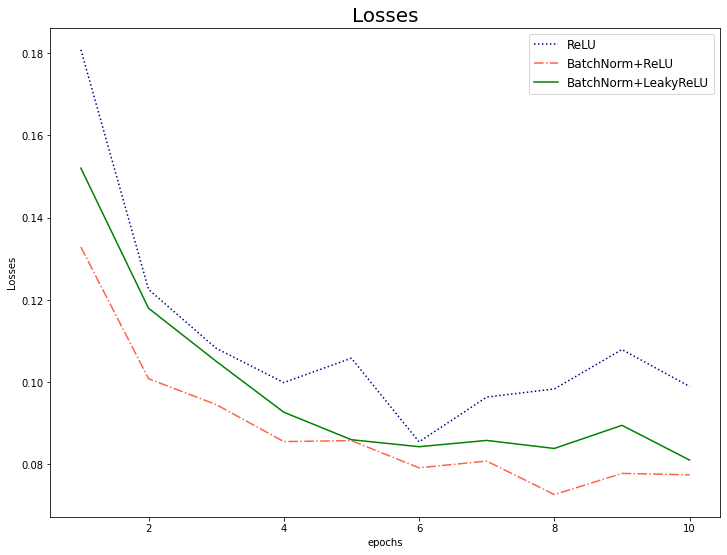

In [64]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,9))
plt.plot(np.arange(1,11),history_a.history['val_loss'],color='navy',linestyle=':')
plt.plot(np.arange(1,11),history_b.history['val_loss'],color='tomato',linestyle='-.')
plt.plot(np.arange(1,11),history_c.history['val_loss'],color='green',linestyle='-')

plt.title('Losses',fontsize=20)
plt.xlabel('epochs')
plt.ylabel('Losses')
plt.legend(['ReLU','BatchNorm+ReLU','BatchNorm+LeakyReLU'],fontsize=12)
plt.show()

mnist 데이터셋에서는 모델별로 차이가 크지는 않다. 하지만 좀 더 복잡한 데이터셋에서는 차이가 날 수 있다.